Zalando MNIST dataset Train Sequential Model

 A Sequential model in TensorFlow is a linear stack of neural network
 layers, where each layer is added one at a time.
 Different types of layers, such as Dense layers (also called fully connected
 layers), Convolutional layers, Pooling layers, and Recurrent layers can be
 added. Also the activation function and other parameters for each layer can
 be configured.

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

2024-04-12 10:46:48.597693: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-12 10:46:48.628725: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Load the MNIST Fashion dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [3]:
# Normalize pixel values to between 0 and 1
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [4]:
# Define the sequential model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10)
])

In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [7]:
# Train the model
history = model.fit(x_train, y_train, epochs=15, validation_split=0.2)

Epoch 1/15
1500/1500 [==============================] - 2s 2ms/step - loss: 0.1974 - accuracy: 0.9252 - val_loss: 0.3536 - val_accuracy: 0.8863
Epoch 2/15
1500/1500 [==============================] - 2s 2ms/step - loss: 0.1894 - accuracy: 0.9275 - val_loss: 0.3710 - val_accuracy: 0.8827
Epoch 3/15
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1863 - accuracy: 0.9289 - val_loss: 0.3329 - val_accuracy: 0.8942
Epoch 4/15
1500/1500 [==============================] - 2s 2ms/step - loss: 0.1785 - accuracy: 0.9320 - val_loss: 0.3483 - val_accuracy: 0.8933
Epoch 5/15
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1757 - accuracy: 0.9336 - val_loss: 0.3629 - val_accuracy: 0.8877
Epoch 6/15
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1694 - accuracy: 0.9354 - val_loss: 0.3619 - val_accuracy: 0.8901
Epoch 7/15
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1659 - accuracy: 0.9356 - val_loss: 0.3990 - val_accuracy:

In [8]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy:", test_acc)

313/313 - 0s - loss: 0.4360 - accuracy: 0.8878 - 337ms/epoch - 1ms/step
Test accuracy: 0.8877999782562256


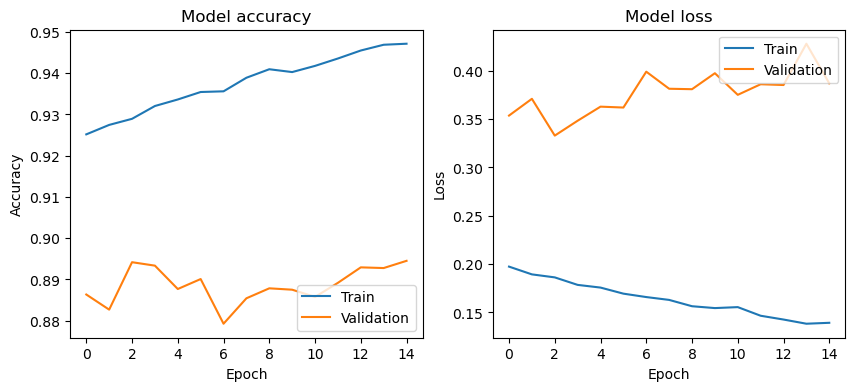

In [9]:
# Plot the training and validation accuracy and loss over time
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="lower right")

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper right")

plt.show()

313/313 [==============================] - 0s 741us/step


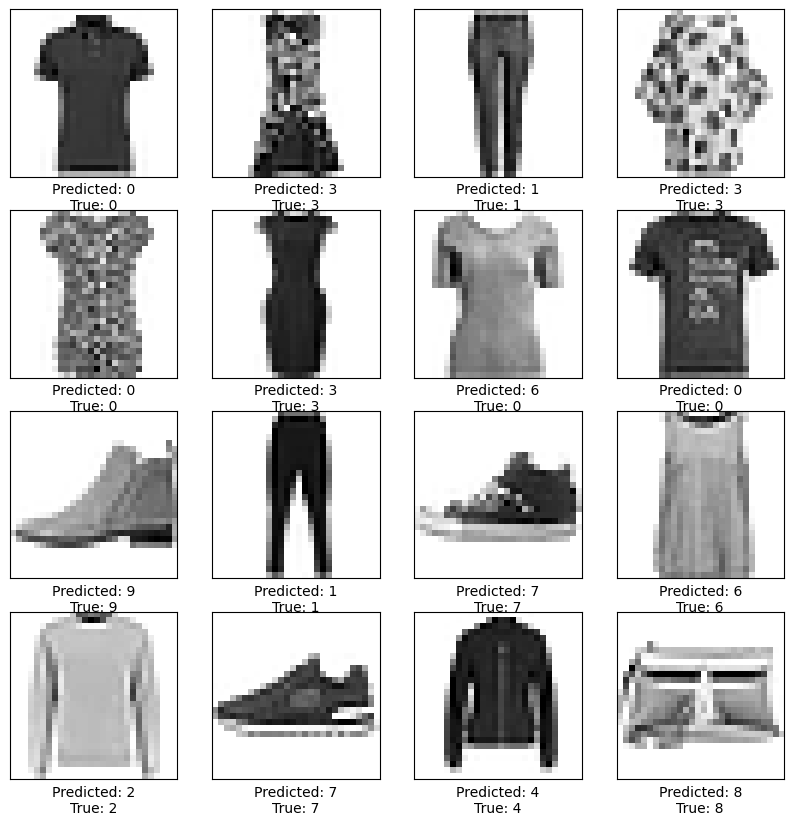

In [10]:
# Plot a random sample of test set images and their predicted labels
random_indices = np.random.choice(x_test.shape[0], 16, replace=False)
test_preds = np.argmax(model.predict(x_test), axis=1)
plt.figure(figsize=(10, 10))
for i, index in enumerate(random_indices):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[index], cmap=plt.cm.binary)
    plt.xlabel(f"Predicted: {test_preds[index]}\nTrue: {y_test[index]}")
plt.show()